# Evaluate Spacecraft Trajectories

In [24]:
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import argrelextrema
from scipy import interpolate
import numpy as np
import scipy
import copy
import pickle
import math
import datetime as dt 

import heliopy.data.spice as spicedata
import heliopy.spice as spice
from astropy.coordinates import SkyCoord
import astropy.units as u

# matplotlib fontsize
%matplotlib notebook
%matplotlib inline
fs1=12
plt.rcParams['savefig.facecolor'] = 'white'

# Set large time interval 

Helios-1 and Helios-2 launched on December 10, 1974, and January 15, 1976, respectively. The Helios spacecrafts continued to send data up to 1985.

In [25]:
starttime = dt.datetime(year=1975, month=1, day=15)
endtime = dt.datetime(year=1984, month=1, day=1)
deltatime = dt.timedelta(hours=1)

times = np.arange(starttime, endtime, deltatime)

In [26]:
times[1]

numpy.datetime64('1975-01-15T01:00:00.000000')

# Helios 1 Trajectory 

In [27]:
spicedata.get_kernel('helios1')
helios1_traj = spice.Trajectory('Helios 1')
helios1_traj.generate_positions(times=times, observing_body='Sun', frame='IAU_SUN')
helios1_coords = helios1_traj.coords

# Earth Trajectory 

In [28]:
earth_traj = spice.Trajectory('Earth')
earth_traj.generate_positions(times=times, observing_body='Sun', frame='IAU_SUN')
earth_coords = earth_traj.coords

# Trajectory Plot


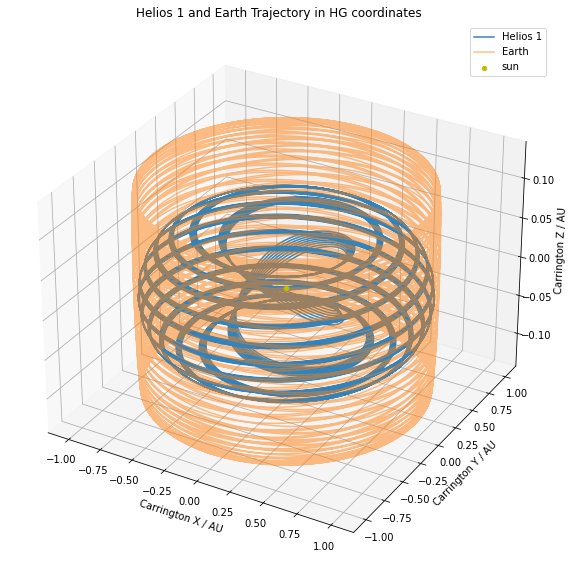

In [29]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')


_ = ax.plot3D(helios1_traj.x.to(u.au), helios1_traj.y.to(u.au), helios1_traj.z.to(u.au), alpha=0.9, label="Helios 1")
_  = ax.plot3D(earth_traj.x.to(u.au), earth_traj.y.to(u.au), earth_traj.z.to(u.au), alpha=0.5, label="Earth")
_ = ax.scatter3D(0, 0, 0, color="y", label="sun")

_ = ax.set_xlabel("Carrington X / AU")
_ = ax.set_ylabel("Carrington Y / AU")
_ = ax.set_zlabel("Carrington Z / AU")
_ = ax.legend()

_ = ax.set_title("Helios 1 and Earth Trajectory in HG coordinates")
plt.savefig('figures/helios1/helios_trajectory_location.png')

# Plot the distance between Helios1 and Earth in HG coordinates

In [30]:
theta_diff = np.abs(helios1_traj.coords.lat - earth_traj.coords.lat)
radial_diff =  np.abs(helios1_traj.coords.radius - earth_traj.coords.radius).to(u.AU)

In [31]:
min_both_index = argrelextrema(theta_diff.value - radial_diff.value, np.less)

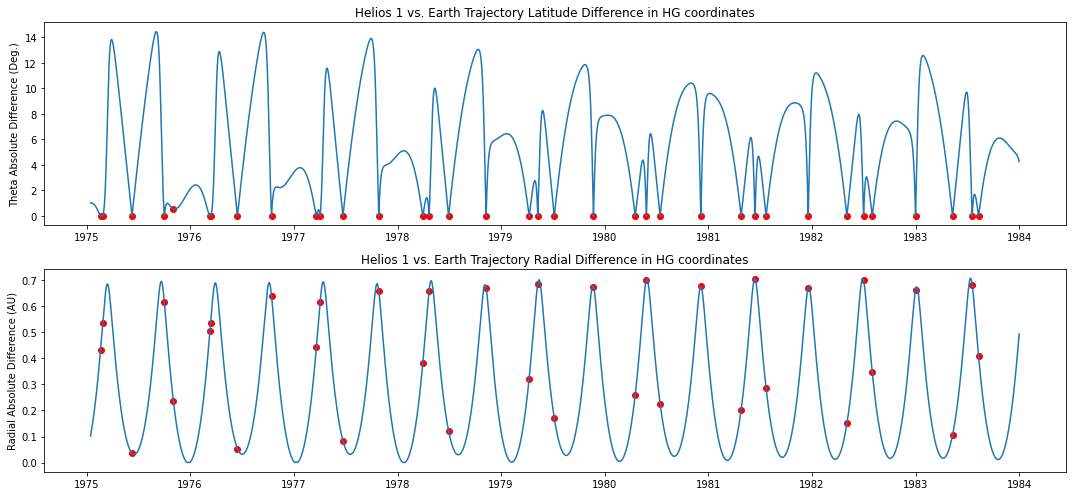

In [32]:
fig, ax = plt.subplots(nrows = 2, ncols= 1, figsize=(15, 7))
_ = ax[0].plot(times, theta_diff)
_ = ax[0].set_ylabel("Theta Absolute Difference (Deg.)")
_ = ax[0].set_title("Helios 1 vs. Earth Trajectory Latitude Difference in HG coordinates")

_ = ax[1].plot(times, radial_diff)
_ = ax[1].set_ylabel("Radial Absolute Difference (AU)")
_ = ax[1].set_title("Helios 1 vs. Earth Trajectory Radial Difference in HG coordinates")


_ = ax[0].scatter(times[min_both_index], theta_diff[min_both_index], c="r")
_ = ax[1].scatter(times[min_both_index], radial_diff[min_both_index], c="r")

plt.tight_layout()
plt.savefig('figures/helios1/helios1_earth_alignment.png')

# Helios 1 local minima

In [41]:
times[min_both_index][-10]

numpy.datetime64('1981-06-13T22:00:00.000000')

## Tme periods

### CR1624, CR1634, CR1639, CR1647, CR1653, CR1661, CR1666, CR1674, CR1681, CR1710, CR1716, CR1723, CR1730, CR1736

# Helios 2

Helios-1 and Helios-2 launched on December 10, 1974, and January 15, 1976, respectively. The Helios spacecrafts continued to send data up to 1985.


In [42]:
starttime = dt.datetime(year=1976, month=3, day=1)
endtime = dt.datetime(year=1980, month=1, day=1)
deltatime = dt.timedelta(hours=1)

times = np.arange(starttime, endtime, deltatime)

In [43]:
spicedata.get_kernel('helios2')
helios2_traj = spice.Trajectory('Helios 2')
helios2_traj.generate_positions(times=times, observing_body='Sun', frame='IAU_SUN')
helios2_coords = helios2_traj.coords

## Earth's Trajectory

In [44]:
earth_traj = spice.Trajectory('Earth')
earth_traj.generate_positions(times=times, observing_body='Sun', frame='IAU_SUN')
earth_coords = earth_traj.coords

## Trajectory plots

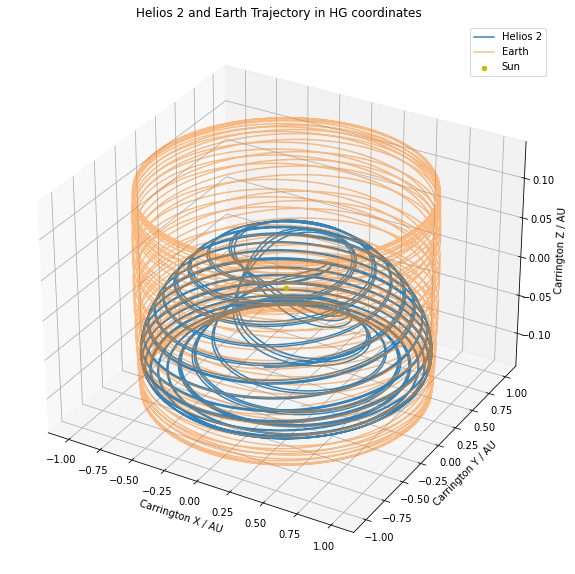

In [45]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')


_ = ax.plot3D(helios2_traj.x.to(u.au), helios2_traj.y.to(u.au), helios2_traj.z.to(u.au), alpha=0.9, label="Helios 2")
_  = ax.plot3D(earth_traj.x.to(u.au), earth_traj.y.to(u.au), earth_traj.z.to(u.au), alpha=0.5, label="Earth")
_ = ax.scatter3D(0, 0, 0, color="y", label="Sun")

_ = ax.set_xlabel("Carrington X / AU")
_ = ax.set_ylabel("Carrington Y / AU")
_ = ax.set_zlabel("Carrington Z / AU")
_ = ax.legend()

_ = ax.set_title("Helios 2 and Earth Trajectory in HG coordinates")
plt.savefig('figures/helios2/helios2_trajectory_location.png')

# Plot the distance between Helios 2 and Earth in HG coordinates

In [46]:
theta_diff2 = np.abs(helios2_traj.coords.lat - earth_traj.coords.lat)
radial_diff2 =  np.abs(helios2_traj.coords.radius - earth_traj.coords.radius).to(u.AU)

In [47]:
min_both_index2 = argrelextrema(theta_diff2.value - radial_diff2.value, np.less)

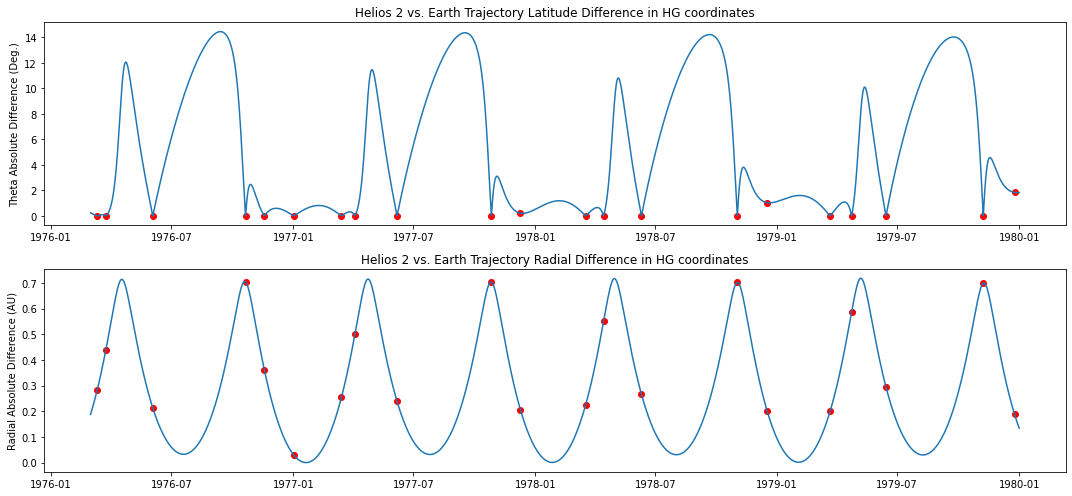

In [48]:
fig, ax = plt.subplots(nrows = 2, ncols= 1, figsize=(15, 7))
_ = ax[0].plot(times, theta_diff2)
_ = ax[0].set_ylabel("Theta Absolute Difference (Deg.)")
_ = ax[0].set_title("Helios 2 vs. Earth Trajectory Latitude Difference in HG coordinates")

_ = ax[1].plot(times, radial_diff2)
_ = ax[1].set_ylabel("Radial Absolute Difference (AU)")
_ = ax[1].set_title("Helios 2 vs. Earth Trajectory Radial Difference in HG coordinates")


_ = ax[0].scatter(times[min_both_index2], theta_diff2[min_both_index2], c="r")
_ = ax[1].scatter(times[min_both_index2], radial_diff2[min_both_index2], c="r")

plt.tight_layout()
plt.savefig('figures/helios2/helios2_earth_alignment.png')

# Helios 2 local minima

In [57]:
times[min_both_index2][-2]

numpy.datetime64('1979-11-07T19:00:00.000000')

## Time Inerval Results


#### CR1642, CR1647, CR1654, CR1660, CR1667, CR1675, CR1680, CR1688